In [136]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer

pd.options.display.max_columns=500

In [155]:
emails_campaign = pd.read_csv('/Users/susanndinoshinge/Downloads/Data_Analytics/email_campaign_data.csv')

In [156]:
emails_campaign.head()


,Sender ID,Sender Name,Sender Email,Recipient ID,Recipient Name,Recipient Email,Recipient Segmentation,Subject Line,Email Body,Date Sent,Time Sent,Day of Week,Month,Year,Open Rate,Click-Through Rate,Conversion Rate,Bounce Rate,Unsubscribe Rate
0,a4c5b58b-a136-40a8-b742-47b944649216,UITDELEN NGO,uitdelenngo@daily.nl,e393ef33-6c27-4b90-b819-21e013014fc7,Marinus Sam,iheerschop@live.com,Sponsor,UITDELEN NGO Sponsorship: Together We Can Make...,"Dear Marinus Sam,\n\nAt UITDELEN NGO, we belie...",2021-09-03,19:30:33,Friday,March,2021,45,23,12,4,3
1,368ec260-764c-4043-a013-6f0caec4eea9,UITDELEN NGO,uitdelenngo@daily.nl,311b51bd-794d-45b2-8f87-cedf4e97170d,Vigo Peeters-Latier,nikkivan-grondelle@hotmail.com,Sponsor,UITDELEN NGO Sponsorship: Together We Can Make...,"Dear Vigo Peeters-Latier,\n\nAt UITDELEN NGO, ...",2023-11-08,02:33:42,Wednesday,March,2020,35,51,60,3,2
2,608e9974-b155-405a-b21b-c8fde5f372c3,UITDELEN NGO,uitdelenngo@daily.nl,d193ae16-67d9-4da0-bc72-dbf1ccd4a9fe,Chloë Hekker,mmathurin@live.com,Sponsor,UITDELEN NGO Sponsorship: Together We Can Make...,"Dear Chloë Hekker,\n\nAt UITDELEN NGO, we beli...",2020-12-24,05:18:39,Wednesday,February,2022,43,95,92,7,0
3,3c8be699-c21e-41f6-9dbf-3de7ec7673d8,UITDELEN NGO,uitdelenngo@daily.nl,8d7a1080-e675-437b-b769-cdd824549abf,Sarah Aarden,werdeslucas@icloud.com,Volunteer,Join UITDELEN NGO: Volunteer Opportunities Await!,"Dear Sarah Aarden,\n\nWe invite you to join UI...",2020-10-31,14:18:34,Tuesday,June,2022,94,82,84,3,4
4,21c00bb2-9e35-4ed8-b6aa-611e9f666ce5,UITDELEN NGO,uitdelenngo@daily.nl,2e8764ae-73b1-4865-9c6f-5e0c85993ffd,Feline van der Sloot,stoffelamelie@yahoo.com,Volunteer,Join UITDELEN NGO: Volunteer Opportunities Await!,"Dear Feline van der Sloot,\n\nWe invite you to...",2022-01-12,17:40:58,Tuesday,June,2022,41,0,34,5,3


In [157]:
emails_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Sender ID               200000 non-null  object
 1   Sender Name             200000 non-null  object
 2   Sender Email            200000 non-null  object
 3   Recipient ID            200000 non-null  object
 4   Recipient Name          200000 non-null  object
 5   Recipient Email         200000 non-null  object
 6   Recipient Segmentation  200000 non-null  object
 7   Subject Line            200000 non-null  object
 8   Email Body              200000 non-null  object
 9   Date Sent               200000 non-null  object
 10  Time Sent               200000 non-null  object
 11  Day of Week             200000 non-null  object
 12  Month                   200000 non-null  object
 13  Year                    200000 non-null  int64 
 14  Open Rate               200000 non-n

In [158]:
emails_campaign.dtypes

Sender ID                 object
Sender Name               object
Sender Email              object
Recipient ID              object
Recipient Name            object
Recipient Email           object
Recipient Segmentation    object
Subject Line              object
Email Body                object
Date Sent                 object
Time Sent                 object
Day of Week               object
Month                     object
Year                       int64
Open Rate                  int64
Click-Through Rate         int64
Conversion Rate            int64
Bounce Rate                int64
Unsubscribe Rate           int64
dtype: object

In [159]:
emails_campaign.isnull().sum()

Sender ID                 0
Sender Name               0
Sender Email              0
Recipient ID              0
Recipient Name            0
Recipient Email           0
Recipient Segmentation    0
Subject Line              0
Email Body                0
Date Sent                 0
Time Sent                 0
Day of Week               0
Month                     0
Year                      0
Open Rate                 0
Click-Through Rate        0
Conversion Rate           0
Bounce Rate               0
Unsubscribe Rate          0
dtype: int64

In [160]:
emails_campaign.duplicated().sum()

0

In [161]:
emails_campaign.describe()

,Year,Open Rate,Click-Through Rate,Conversion Rate,Bounce Rate,Unsubscribe Rate
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2021.535055,49.937590,50.040790,49.955970,4.997400,2.502435
std,1.148737,29.081045,29.162286,29.153863,3.162452,1.707837
min,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,25.000000,25.000000,25.000000,2.000000,1.000000
50%,2022.000000,50.000000,50.000000,50.000000,5.000000,3.000000
75%,2023.000000,75.000000,75.000000,75.000000,8.000000,4.000000
max,2024.000000,100.000000,100.000000,100.000000,10.000000,5.000000



The descriptive statistics above give an overview of the central tendency, spread, and distribution of the numeric features in the dataset.
Here are some insights based on the provided statistics:
Year:
The data spans from 2020 to 2024.
Most of the data points fall between 2021 and 2023.
Open Rate, Click-Through Rate, Conversion Rate:
These rates seem to have a roughly uniform distribution, ranging from 0 to 100.
The mean and median values are close to 50, indicating a balanced distribution between the lower and upper ends.
Bounce Rate, Unsubscribe Rate:
These rates have lower values, ranging from 0 to 10.
The mean values are around 5, suggesting that, on average, the bounce and unsubscribe rates are moderate.
These insights provide a general understanding of the distribution of the numeric features. 


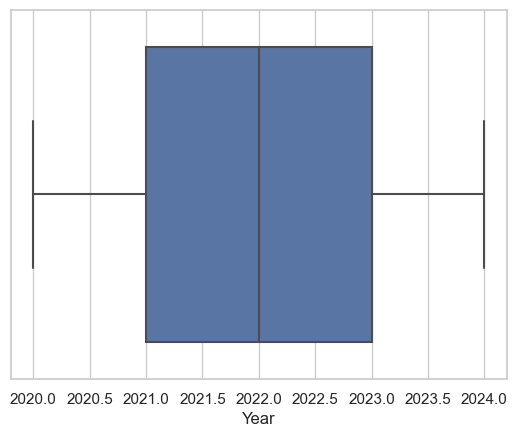

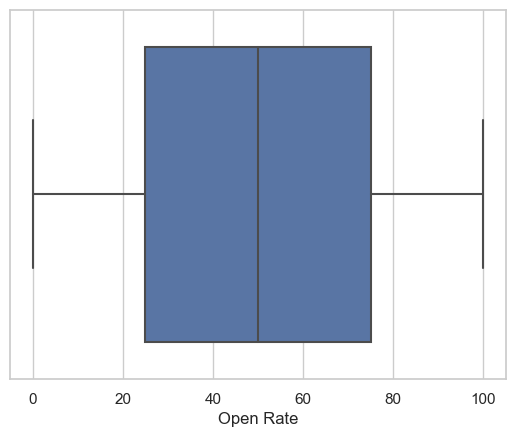

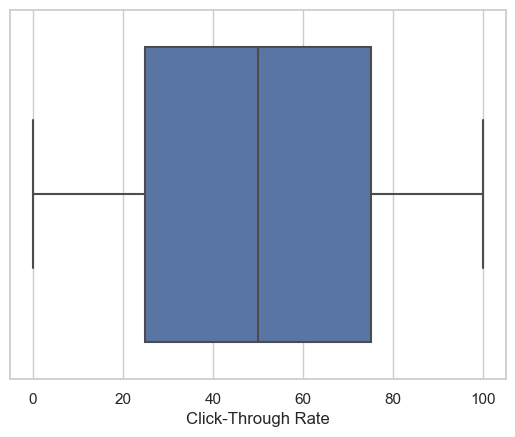

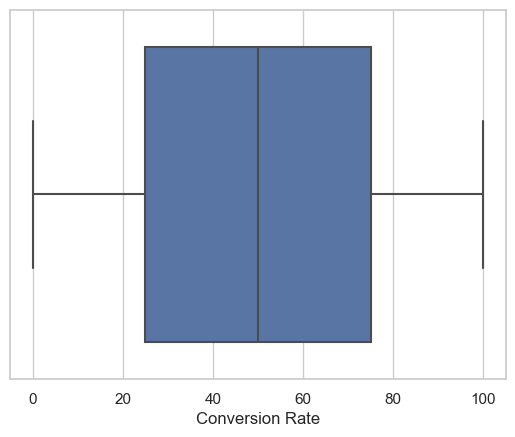

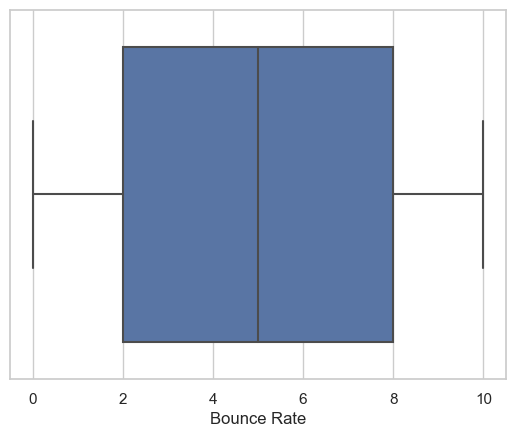

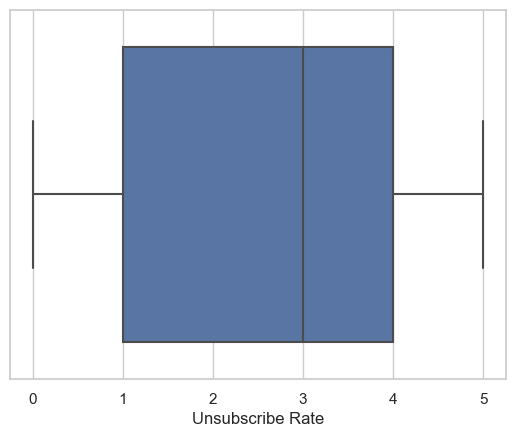

In [162]:
numerical_columns = emails_campaign.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    sns.boxplot(x=emails_campaign[column])
    plt.show()

In [163]:
z_scores = stats.zscore(emails_campaign.select_dtypes(include=['float64', 'int64']))

# Define a threshold (i am going to use 3)
threshold = 3

# Find data points with z-scores beyond the threshold
outliers = (np.abs(z_scores) > threshold).all(axis=1)

print("Rows with Outliers:")
print(emails_campaign[outliers])

Rows with Outliers:
Empty DataFrame
Columns: [Sender ID, Sender Name, Sender Email, Recipient ID, Recipient Name, Recipient Email, Recipient Segmentation, Subject Line, Email Body, Date Sent, Time Sent, Day of Week, Month, Year, Open Rate, Click-Through Rate, Conversion Rate, Bounce Rate, Unsubscribe Rate]
Index: []


# Feature Engineering

Date and Time features related to the timing of emails.
Create binary features for specific days of the week when emails are sent.

Text features, extract features from the subject line and email body, such as their length.
Check for the presence of specific keywords or phrases in the subject line.

In [164]:
emails_campaign['Timestamp'] = pd.to_datetime(emails_campaign['Date Sent'] + ' ' + emails_campaign['Time Sent'])
emails_campaign['Month'] = emails_campaign['Timestamp'].dt.month
emails_campaign['Year'] = emails_campaign['Timestamp'].dt.year
emails_campaign['Hour'] = emails_campaign['Timestamp'].dt.hour

emails_campaign['SubjectLength'] = emails_campaign['Subject Line'].apply(len)
emails_campaign['SponsorshipSubject'] = emails_campaign['Subject Line'].str.contains('Sponsorship', case=False, na=False).astype(int)
emails_campaign['JoinSubject'] = emails_campaign['Subject Line'].str.contains('Join', case=False, na=False).astype(int)
emails_campaign['PartnershipSubject'] = emails_campaign['Subject Line'].str.contains('Partnership', case=False, na=False).astype(int)
#emails_campaign['SupportSubject'] = emails_campaign['Subject Line'].str.contains('Support', case=False, na=False).astype(int)

emails_campaign['SenderEmailFrequency'] = emails_campaign.groupby('Sender Email')['Sender Email'].transform('count')

emails_campaign = pd.get_dummies(emails_campaign, columns=['Recipient Segmentation'], prefix='Segmentation', drop_first=True)

emails_campaign['Hour'] = pd.to_datetime(emails_campaign['Time Sent'], format='%H:%M:%S').dt.hour
emails_campaign['BusinessHours'] = ((emails_campaign['Hour'] >= 9) & (emails_campaign['Hour'] <= 17)).astype(int)

# Drop the intermediate 'Timestamp' column
emails_campaign = emails_campaign.drop(columns=['Timestamp'])


In [165]:
emails_campaign.head(10)

,Sender ID,Sender Name,Sender Email,Recipient ID,Recipient Name,Recipient Email,Subject Line,Email Body,Date Sent,Time Sent,Day of Week,Month,Year,Open Rate,Click-Through Rate,Conversion Rate,Bounce Rate,Unsubscribe Rate,Hour,SubjectLength,SponsorshipSubject,JoinSubject,PartnershipSubject,SenderEmailFrequency,Segmentation_Partner,Segmentation_Sponsor,Segmentation_Volunteer,BusinessHours
0,a4c5b58b-a136-40a8-b742-47b944649216,UITDELEN NGO,uitdelenngo@daily.nl,e393ef33-6c27-4b90-b819-21e013014fc7,Marinus Sam,iheerschop@live.com,UITDELEN NGO Sponsorship: Together We Can Make...,"Dear Marinus Sam,\n\nAt UITDELEN NGO, we belie...",2021-09-03,19:30:33,Friday,9,2021,45,23,12,4,3,19,60,1,0,0,200000,False,True,False,0
1,368ec260-764c-4043-a013-6f0caec4eea9,UITDELEN NGO,uitdelenngo@daily.nl,311b51bd-794d-45b2-8f87-cedf4e97170d,Vigo Peeters-Latier,nikkivan-grondelle@hotmail.com,UITDELEN NGO Sponsorship: Together We Can Make...,"Dear Vigo Peeters-Latier,\n\nAt UITDELEN NGO, ...",2023-11-08,02:33:42,Wednesday,11,2023,35,51,60,3,2,2,60,1,0,0,200000,False,True,False,0
2,608e9974-b155-405a-b21b-c8fde5f372c3,UITDELEN NGO,uitdelenngo@daily.nl,d193ae16-67d9-4da0-bc72-dbf1ccd4a9fe,Chloë Hekker,mmathurin@live.com,UITDELEN NGO Sponsorship: Together We Can Make...,"Dear Chloë Hekker,\n\nAt UITDELEN NGO, we beli...",2020-12-24,05:18:39,Wednesday,12,2020,43,95,92,7,0,5,60,1,0,0,200000,False,True,False,0
3,3c8be699-c21e-41f6-9dbf-3de7ec7673d8,UITDELEN NGO,uitdelenngo@daily.nl,8d7a1080-e675-437b-b769-cdd824549abf,Sarah Aarden,werdeslucas@icloud.com,Join UITDELEN NGO: Volunteer Opportunities Await!,"Dear Sarah Aarden,\n\nWe invite you to join UI...",2020-10-31,14:18:34,Tuesday,10,2020,94,82,84,3,4,14,49,0,1,0,200000,False,False,True,1
4,21c00bb2-9e35-4ed8-b6aa-611e9f666ce5,UITDELEN NGO,uitdelenngo@daily.nl,2e8764ae-73b1-4865-9c6f-5e0c85993ffd,Feline van der Sloot,stoffelamelie@yahoo.com,Join UITDELEN NGO: Volunteer Opportunities Await!,"Dear Feline van der Sloot,\n\nWe invite you to...",2022-01-12,17:40:58,Tuesday,1,2022,41,0,34,5,3,17,49,0,1,0,200000,False,False,True,1
5,b45caeb4-182c-4f73-b46b-bbb081d82e6f,UITDELEN NGO,uitdelenngo@daily.nl,5eba86cf-0562-4d41-8fe6-9030bb42b9d7,Linn Westermann,kerkhofjoep@live.com,UITDELEN NGO Sponsorship: Together We Can Make...,"Dear Linn Westermann,\n\nAt UITDELEN NGO, we b...",2021-12-23,08:02:13,Monday,12,2021,11,47,35,1,0,8,60,1,0,0,200000,False,True,False,0
6,e46b842a-2b05-4e18-b392-855a6557b336,UITDELEN NGO,uitdelenngo@daily.nl,ea2aa457-f376-45cc-9ecb-37ea455a3dbb,Rik Zaal,van-ghoerleisabel@hotmail.com,UITDELEN NGO Partnership: Let's Collaborate fo...,"Dear Rik Zaal,\n\nWe are reaching out to explo...",2022-12-31,20:47:38,Tuesday,12,2022,27,36,78,2,1,20,56,0,0,1,200000,True,False,False,0
7,75f19c94-0cdd-4d9e-9f2a-5a9c274c4bf3,UITDELEN NGO,uitdelenngo@daily.nl,a28377ec-fa94-4370-87bf-93bea28a5255,Ecrin van Saksen-Rutten,livbloemendaal@outlook.com,UITDELEN NGO Partnership: Let's Collaborate fo...,"Dear Ecrin van Saksen-Rutten,\n\nWe are reachi...",2022-02-28,14:21:33,Wednesday,2,2022,88,64,70,2,0,14,56,0,0,1,200000,True,False,False,1
8,3f3fcc11-5beb-426d-b1ec-67665abb20af,UITDELEN NGO,uitdelenngo@daily.nl,7de4a522-4056-4c91-82d5-46944b7e07d6,Jolijn Luitgardis van Neustrië,stefande-swart@gmail.com,UITDELEN NGO Sponsorship: Together We Can Make...,"Dear Jolijn Luitgardis van Neustrië,\n\nAt UIT...",2022-02-12,01:52:45,Friday,2,2022,53,46,13,2,5,1,60,1,0,0,200000,False,True,False,0
9,e4b90654-6009-4012-94c7-1301c0ecf804,UITDELEN NGO,uitdelenngo@daily.nl,af9100f2-f656-4b5d-9cd5-79bedd430212,Elizabeth Coret-Coredo,justin19@mns.nl,UITDELEN NGO Sponsorship: Together We Can Make...,"Dear Elizabeth Coret-Coredo,\n\nAt UITDELEN NG...",2023-01-19,19:28:04,Friday,1,2023,19,11,25,6,5,19,60,1,0,0,200000,False,True,False,0


In [166]:
emails_campaign.info

<bound method DataFrame.info of                                    Sender ID   Sender Name  \
0       a4c5b58b-a136-40a8-b742-47b944649216  UITDELEN NGO   
1       368ec260-764c-4043-a013-6f0caec4eea9  UITDELEN NGO   
2       608e9974-b155-405a-b21b-c8fde5f372c3  UITDELEN NGO   
3       3c8be699-c21e-41f6-9dbf-3de7ec7673d8  UITDELEN NGO   
4       21c00bb2-9e35-4ed8-b6aa-611e9f666ce5  UITDELEN NGO   
...                                      ...           ...   
199995  a4430387-70e2-4a6a-9dfb-171a43d64d29  UITDELEN NGO   
199996  122c0203-b5e5-4958-ae7f-c650626ad2f2  UITDELEN NGO   
199997  77cc52e8-57d9-49a4-b6af-741010fbf2b3  UITDELEN NGO   
199998  5df6913f-7956-4e63-9d42-8070f3c19b88  UITDELEN NGO   
199999  cff3fd41-97a2-48f9-999e-23f6ffb98929  UITDELEN NGO   

                Sender Email                          Recipient ID  \
0       uitdelenngo@daily.nl  e393ef33-6c27-4b90-b819-21e013014fc7   
1       uitdelenngo@daily.nl  311b51bd-794d-45b2-8f87-cedf4e97170d   
2       uitde

In [167]:
print(emails_campaign.columns)

Index(['Sender ID', 'Sender Name', 'Sender Email', 'Recipient ID',
       'Recipient Name', 'Recipient Email', 'Subject Line', 'Email Body',
       'Date Sent', 'Time Sent', 'Day of Week', 'Month', 'Year', 'Open Rate',
       'Click-Through Rate', 'Conversion Rate', 'Bounce Rate',
       'Unsubscribe Rate', 'Hour', 'SubjectLength', 'SponsorshipSubject',
       'JoinSubject', 'PartnershipSubject', 'SenderEmailFrequency',
       'Segmentation_Partner', 'Segmentation_Sponsor',
       'Segmentation_Volunteer', 'BusinessHours'],
      dtype='object')


In [168]:
emails_campaign.describe()

,Month,Year,Open Rate,Click-Through Rate,Conversion Rate,Bounce Rate,Unsubscribe Rate,Hour,SubjectLength,SponsorshipSubject,JoinSubject,PartnershipSubject,SenderEmailFrequency,BusinessHours
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0,200000.000000
mean,6.439540,2021.536640,49.937590,50.040790,49.955970,4.997400,2.502435,11.486305,53.236810,0.249980,0.249290,0.248470,200000.0,0.374970
std,3.485113,1.147229,29.081045,29.162286,29.153863,3.162452,1.707837,6.913749,4.972367,0.433002,0.432603,0.432127,0.0,0.484116
min,1.000000,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,200000.0,0.000000
25%,3.000000,2021.000000,25.000000,25.000000,25.000000,2.000000,1.000000,6.000000,48.000000,0.000000,0.000000,0.000000,200000.0,0.000000
50%,6.000000,2022.000000,50.000000,50.000000,50.000000,5.000000,3.000000,11.000000,49.000000,0.000000,0.000000,0.000000,200000.0,0.000000
75%,9.000000,2023.000000,75.000000,75.000000,75.000000,8.000000,4.000000,17.000000,56.000000,0.000000,0.000000,0.000000,200000.0,1.000000
max,12.000000,2024.000000,100.000000,100.000000,100.000000,10.000000,5.000000,23.000000,60.000000,1.000000,1.000000,1.000000,200000.0,1.000000


In [169]:
#Creating new feature indicating whether the recipient's name appears in the email body # I think it's very important for my Analysis
emails_campaign['RecipientNameInBody'] =emails_campaign.apply(lambda row: 1 if row['Recipient Name'].lower() in row['Email Body'].lower() else 0, axis=1)

In [152]:
#mapping "Day of Week" to numeric values:
#if 'Day of Week' in emails_campaign.columns:
    #day_of_week_mapping = {1:'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
    #emails_campaign['Day of Week'] = emails_campaign['Day of Week'].map(day_of_week_mapping)
#else:
    #print("Day of Weel has already been mapped.")


In [170]:
#mapping "Day of Week" to numeric values:
if 'Day of Week' in emails_campaign.columns:
    day_of_week_mapping = {'Monday' :1 ,'Tuesday' :2, 'Wednesday' :3 , 'Thursday' :4 ,'Friday' :5 , 'Saturday' :6 , 'Sunday' :7}
    emails_campaign['Day of Week'] = emails_campaign['Day of Week'].map(day_of_week_mapping)
    
else:
    print("Day of Weel has already been mapped.")

In [171]:
emails_campaign['Day of Week']

0         5
1         3
2         3
3         2
4         2
         ..
199995    3
199996    5
199997    2
199998    2
199999    5
Name: Day of Week, Length: 200000, dtype: int64

In [172]:
emails_campaign['Day of Week'] = emails_campaign['Day of Week'].astype(int)

In [173]:
# One-Hot Encoding for 'Sender Email'
sender_email_encoder = OneHotEncoder()
sender_email_encoded = sender_email_encoder.fit_transform(emails_campaign[['Sender Email']])


In [174]:
#text data preprocessing for "Email Body" and "Subject Line" columns

emails_campaign['Email Body'] = emails_campaign['Email Body'].fillna('')  # Handle missing values

# Tokenization, Stop Word Removal, and Stemming
def preprocess_text(text):
    # Tokenization
    tokens = text.split()
    
    # Removing Stop Words and Punctuation
    tokens = [word for word in tokens if word.lower() not in ENGLISH_STOP_WORDS and word not in string.punctuation]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply text preprocessing to 'Email Body' and 'Subject Line'
emails_campaign['Email Body'] = emails_campaign['Email Body'].apply(preprocess_text)
emails_campaign['Subject Line'] = emails_campaign['Subject Line'].apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
email_body_tfidf = tfidf_vectorizer.fit_transform(emails_campaign['Email Body'])
subject_line_tfidf = tfidf_vectorizer.fit_transform(emails_campaign['Subject Line'])


In [175]:
emails_campaign.head()

,Sender ID,Sender Name,Sender Email,Recipient ID,Recipient Name,Recipient Email,Subject Line,Email Body,Date Sent,Time Sent,Day of Week,Month,Year,Open Rate,Click-Through Rate,Conversion Rate,Bounce Rate,Unsubscribe Rate,Hour,SubjectLength,SponsorshipSubject,JoinSubject,PartnershipSubject,SenderEmailFrequency,Segmentation_Partner,Segmentation_Sponsor,Segmentation_Volunteer,BusinessHours,RecipientNameInBody
0,a4c5b58b-a136-40a8-b742-47b944649216,UITDELEN NGO,uitdelenngo@daily.nl,e393ef33-6c27-4b90-b819-21e013014fc7,Marinus Sam,iheerschop@live.com,uitdelen ngo sponsorship: make difference!,"dear marinu sam, uitdelen ngo, believ power pa...",2021-09-03,19:30:33,5,9,2021,45,23,12,4,3,19,60,1,0,0,200000,False,True,False,0,1
1,368ec260-764c-4043-a013-6f0caec4eea9,UITDELEN NGO,uitdelenngo@daily.nl,311b51bd-794d-45b2-8f87-cedf4e97170d,Vigo Peeters-Latier,nikkivan-grondelle@hotmail.com,uitdelen ngo sponsorship: make difference!,"dear vigo peeters-latier, uitdelen ngo, believ...",2023-11-08,02:33:42,3,11,2023,35,51,60,3,2,2,60,1,0,0,200000,False,True,False,0,1
2,608e9974-b155-405a-b21b-c8fde5f372c3,UITDELEN NGO,uitdelenngo@daily.nl,d193ae16-67d9-4da0-bc72-dbf1ccd4a9fe,Chloë Hekker,mmathurin@live.com,uitdelen ngo sponsorship: make difference!,"dear chloë hekker, uitdelen ngo, believ power ...",2020-12-24,05:18:39,3,12,2020,43,95,92,7,0,5,60,1,0,0,200000,False,True,False,0,1
3,3c8be699-c21e-41f6-9dbf-3de7ec7673d8,UITDELEN NGO,uitdelenngo@daily.nl,8d7a1080-e675-437b-b769-cdd824549abf,Sarah Aarden,werdeslucas@icloud.com,join uitdelen ngo: volunt opportun await!,"dear sarah aarden, invit join uitdelen ngo vol...",2020-10-31,14:18:34,2,10,2020,94,82,84,3,4,14,49,0,1,0,200000,False,False,True,1,1
4,21c00bb2-9e35-4ed8-b6aa-611e9f666ce5,UITDELEN NGO,uitdelenngo@daily.nl,2e8764ae-73b1-4865-9c6f-5e0c85993ffd,Feline van der Sloot,stoffelamelie@yahoo.com,join uitdelen ngo: volunt opportun await!,"dear felin van der sloot, invit join uitdelen ...",2022-01-12,17:40:58,2,1,2022,41,0,34,5,3,17,49,0,1,0,200000,False,False,True,1,1


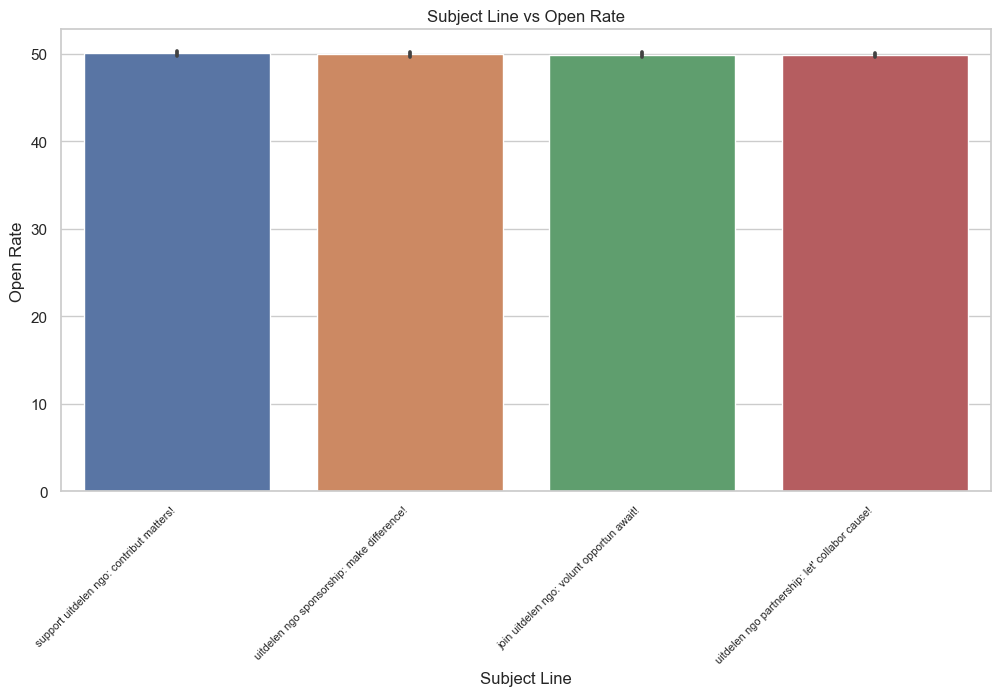

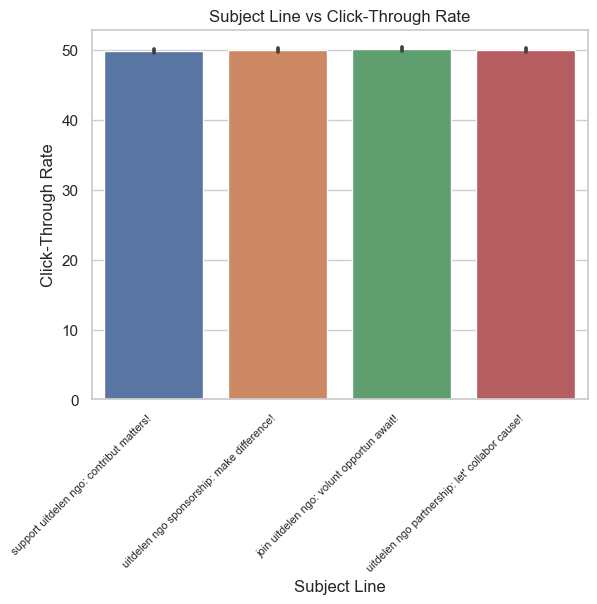

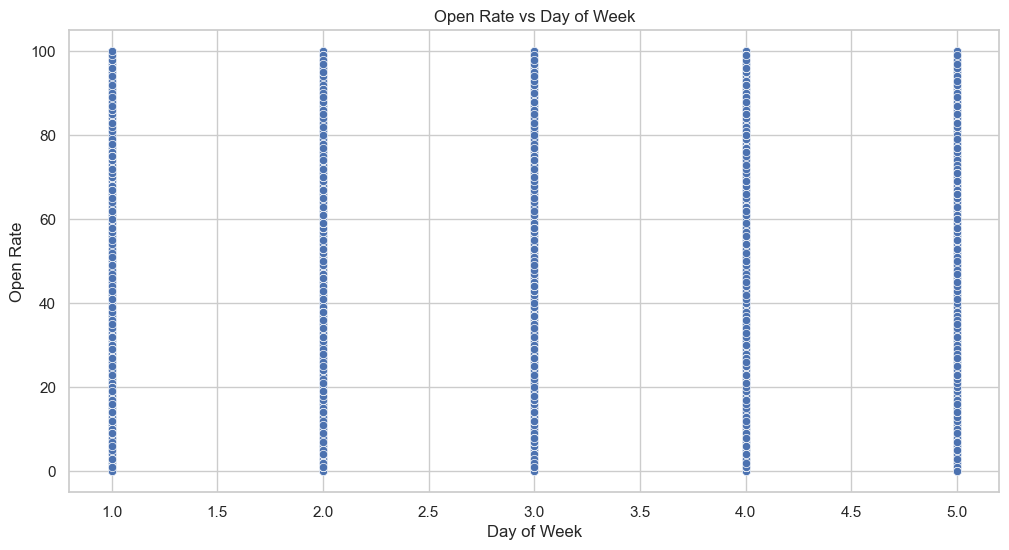

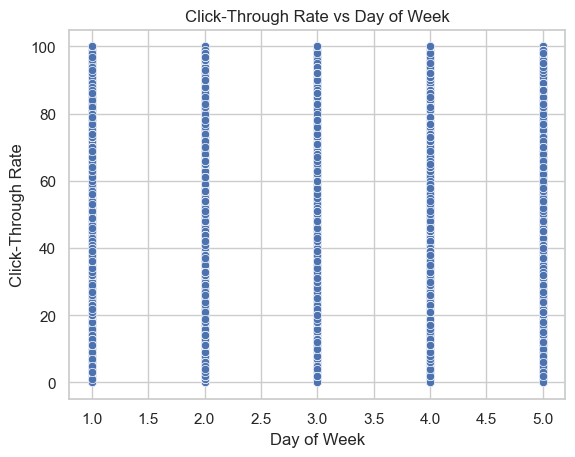

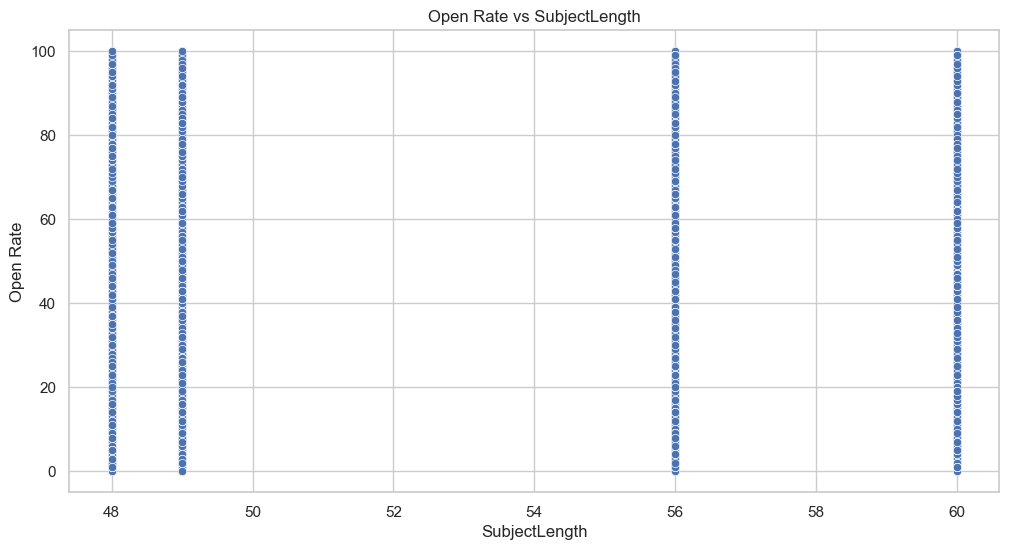

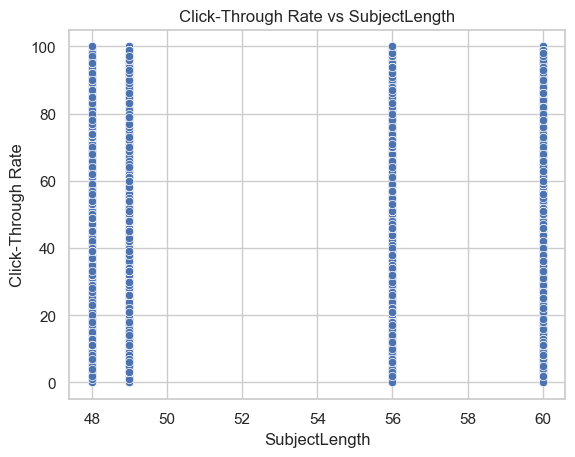

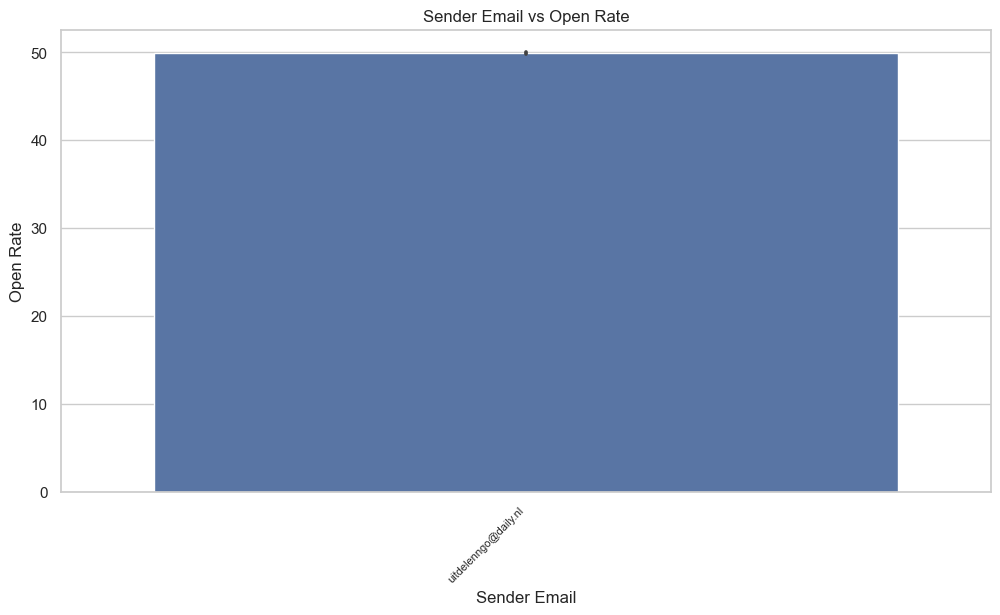

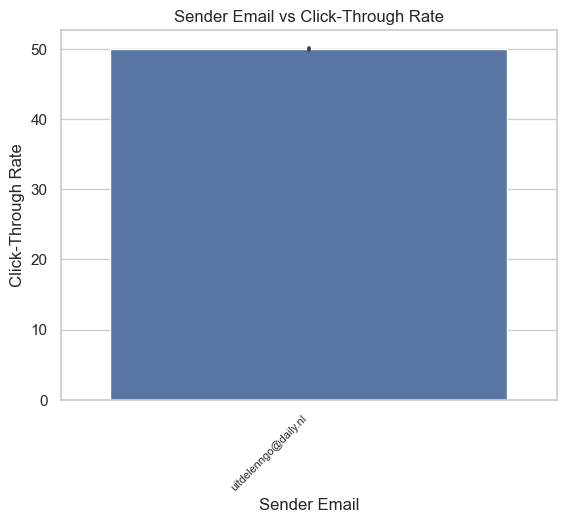

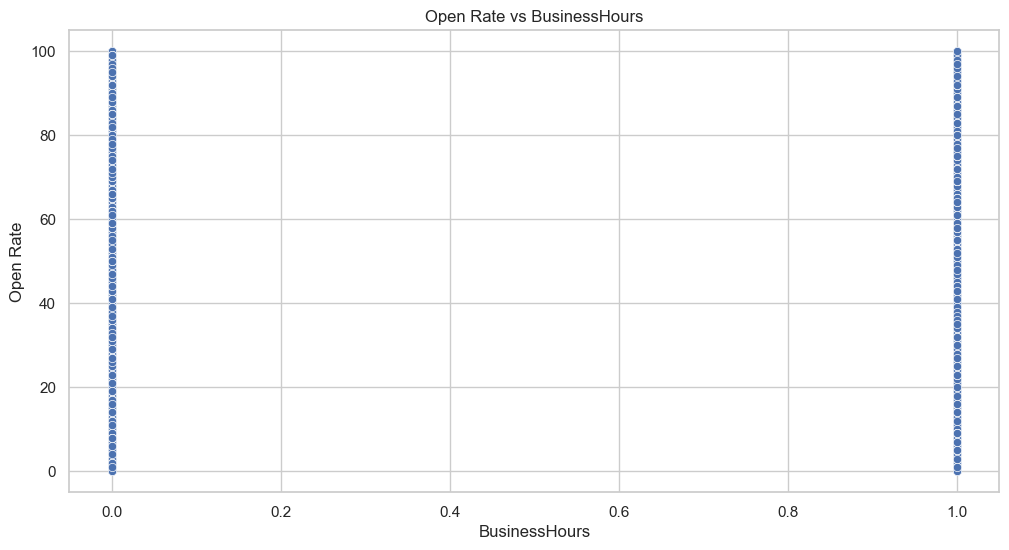

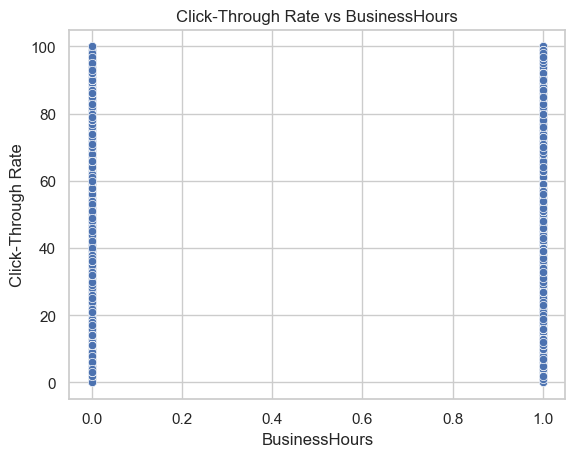

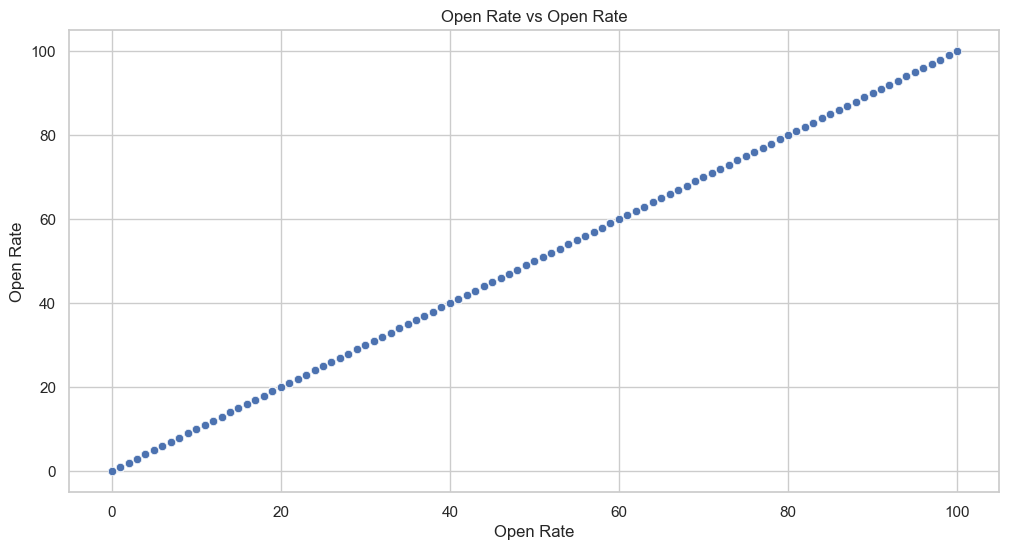

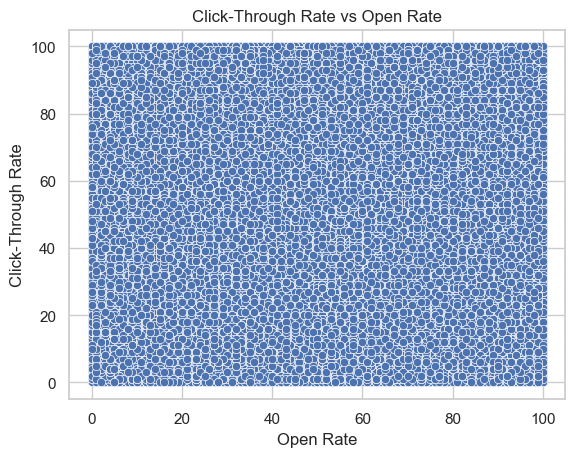

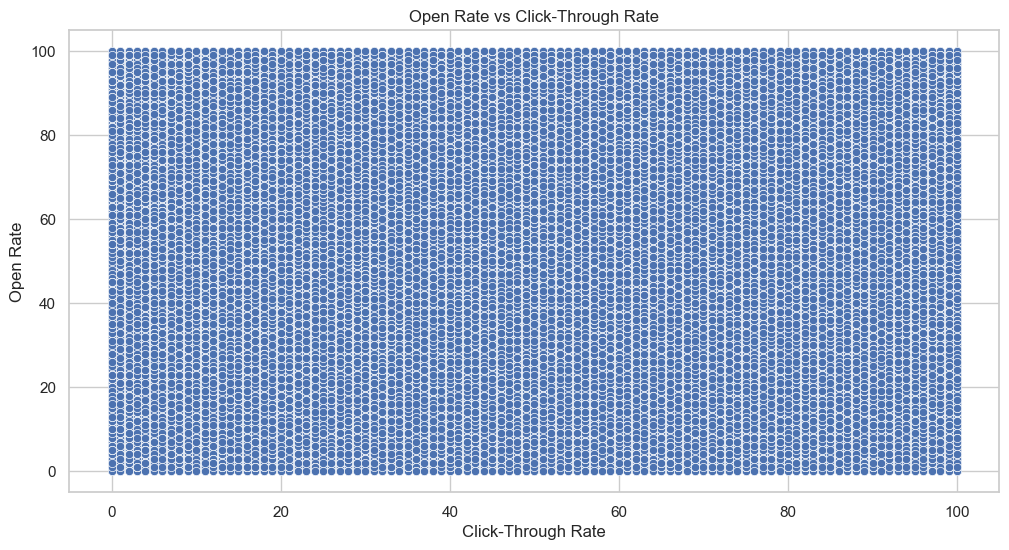

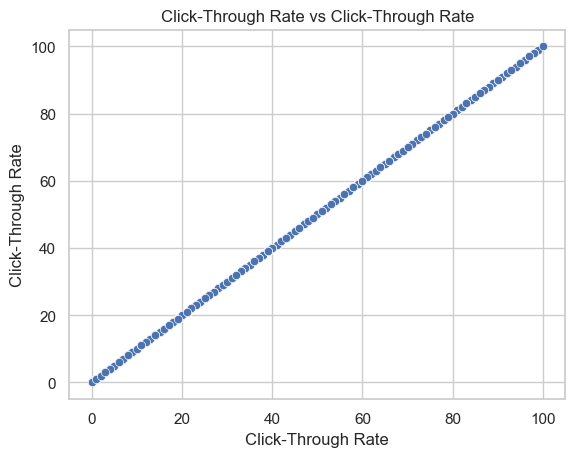

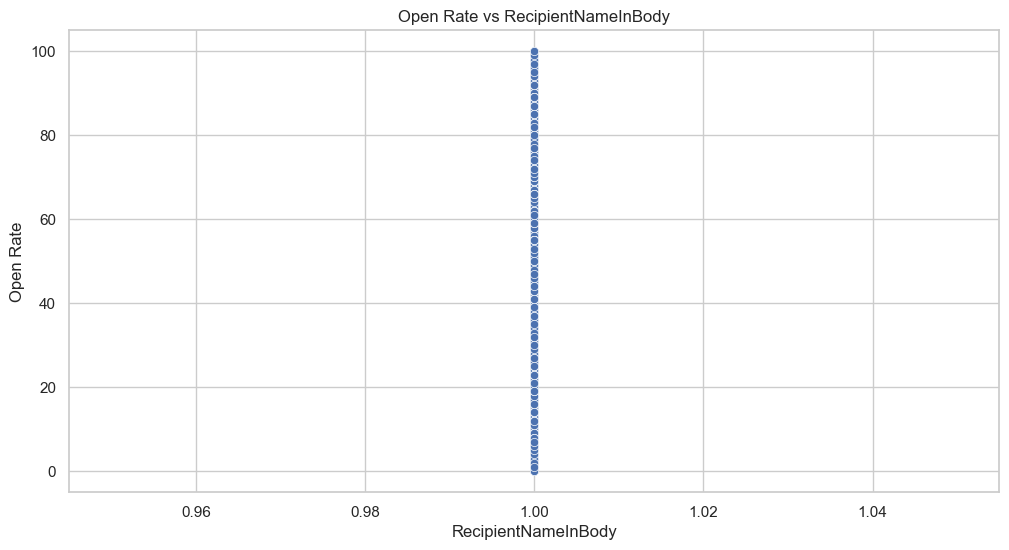

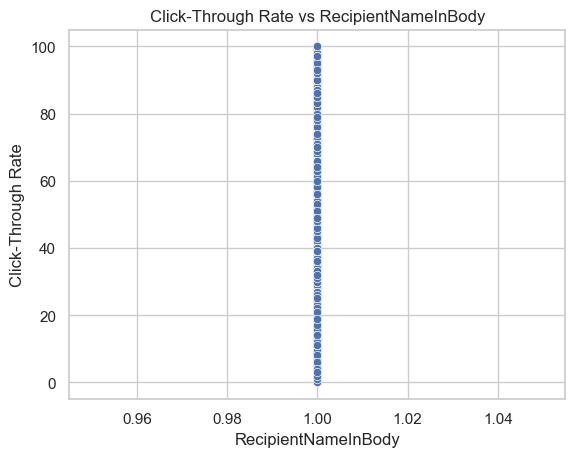

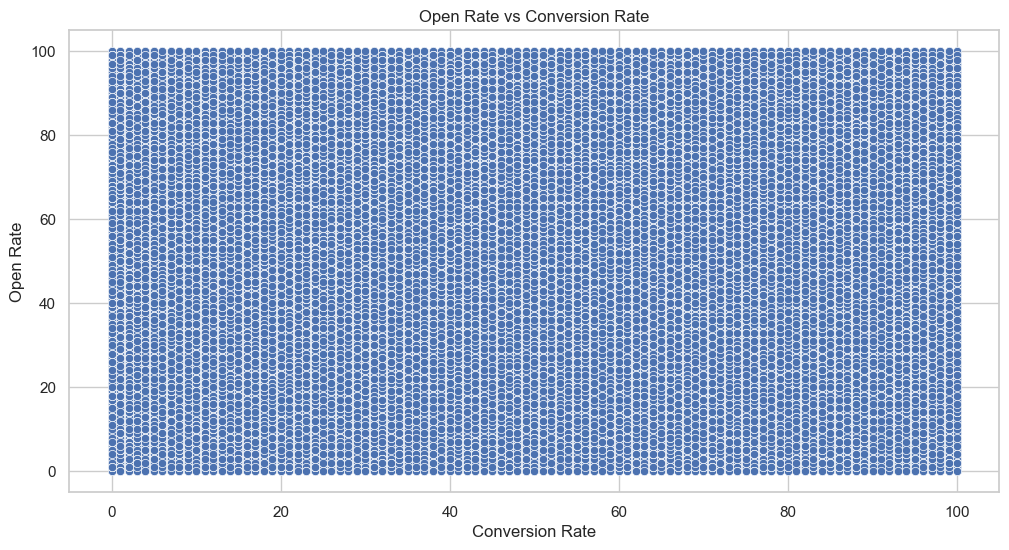

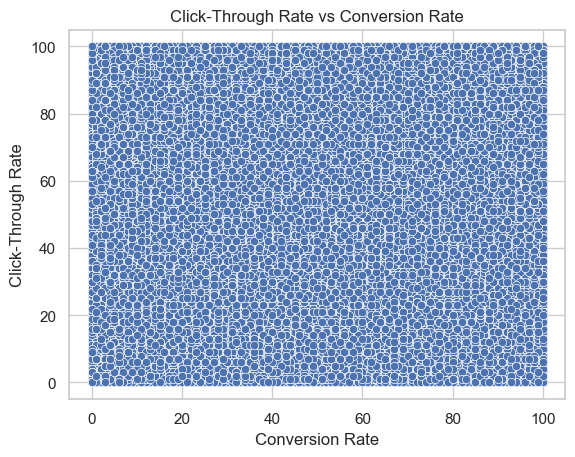

<Figure size 1200x600 with 0 Axes>

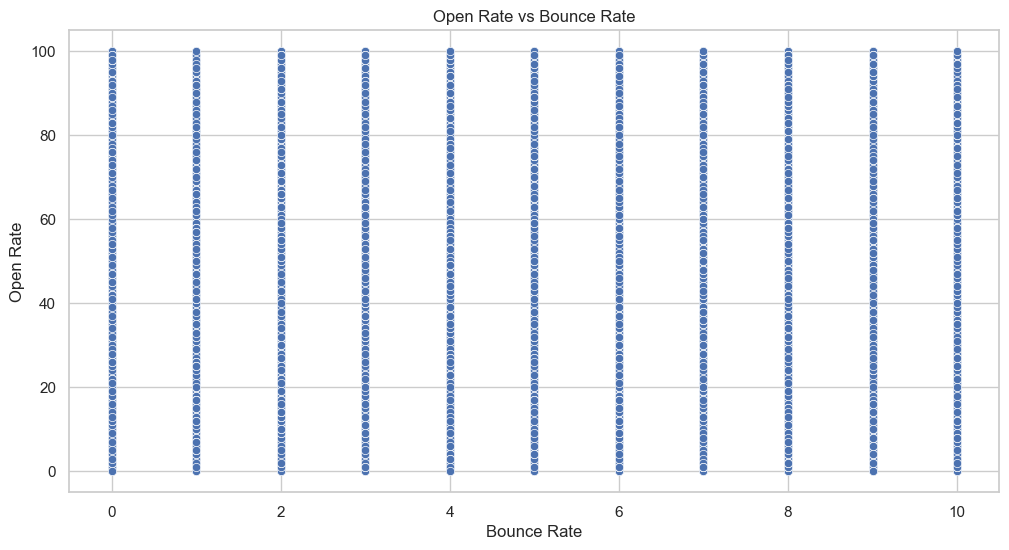

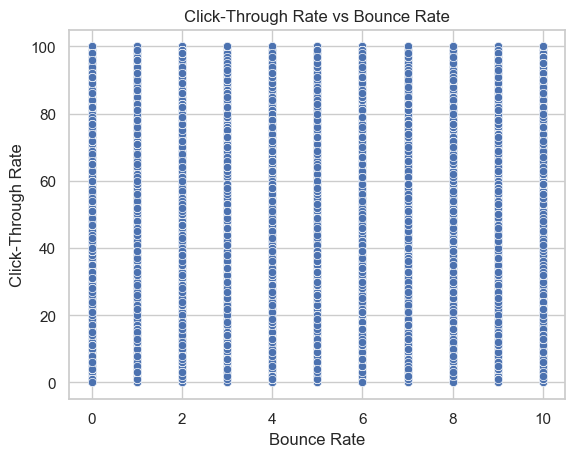

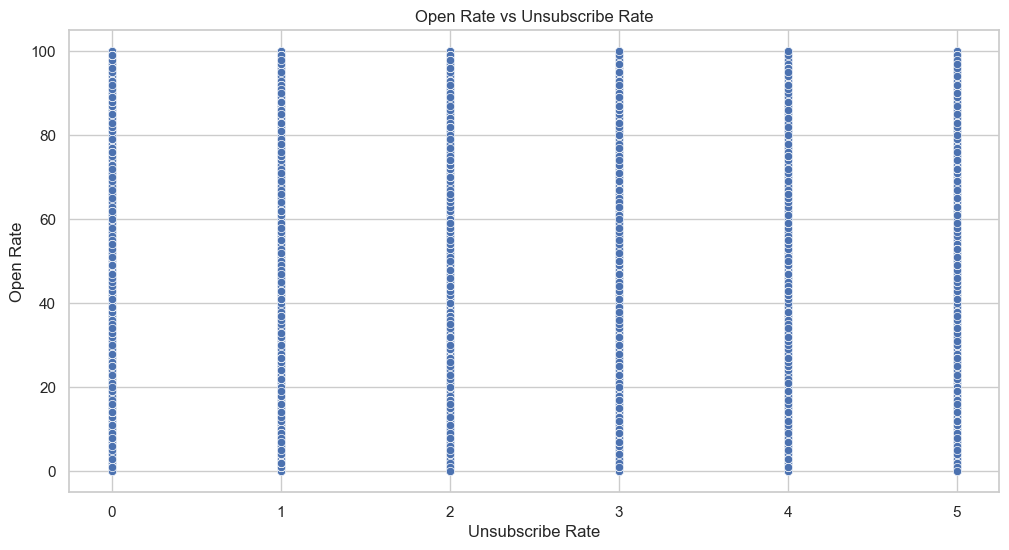

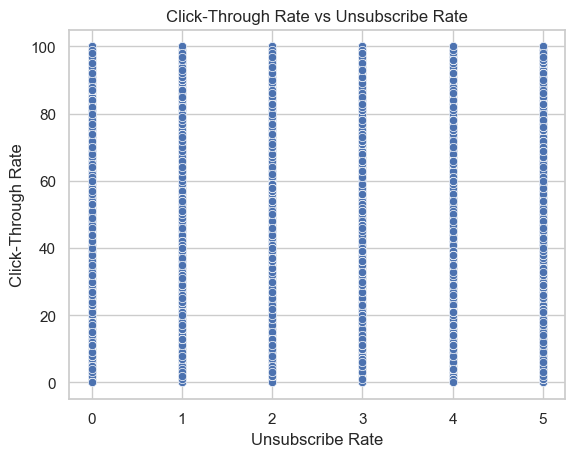

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [176]:
columns_of_interest = ['Subject Line', 'Day of Week', 'SubjectLength',
                        'Sender Email', 'BusinessHours', 'Open Rate', 'Click-Through Rate',
                        'RecipientNameInBody', 'Conversion Rate', 'Year', 'Bounce Rate',
                        'Unsubscribe Rate', 'Hour', 'Month']
#style
sns.set(style="whitegrid")

for column in columns_of_interest:
    plt.figure(figsize=(12, 6))

    if emails_campaign[column].dtype == 'O' or emails_campaign[column].dtype == 'bool':
        order = emails_campaign.groupby(column)['Open Rate'].mean().sort_values(ascending=False).index
        sns.barplot(x=column, y='Open Rate', data=emails_campaign, order=order)
        plt.title(f'{column} vs Open Rate')
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.show()

        sns.barplot(x=column, y='Click-Through Rate', data=emails_campaign, order=order)
        plt.title(f'{column} vs Click-Through Rate')
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.show()

    elif emails_campaign[column].dtype == 'int64' or emails_campaign[column].dtype == 'float64':
        sns.scatterplot(x=column, y='Open Rate', data=emails_campaign)
        plt.title(f'Open Rate vs {column}')
        plt.show()

        sns.scatterplot(x=column, y='Click-Through Rate', data=emails_campaign)
        plt.title(f'Click-Through Rate vs {column}')
        plt.show()

In [179]:
#using open rate as my target variable
target_variable = 'Open Rate'

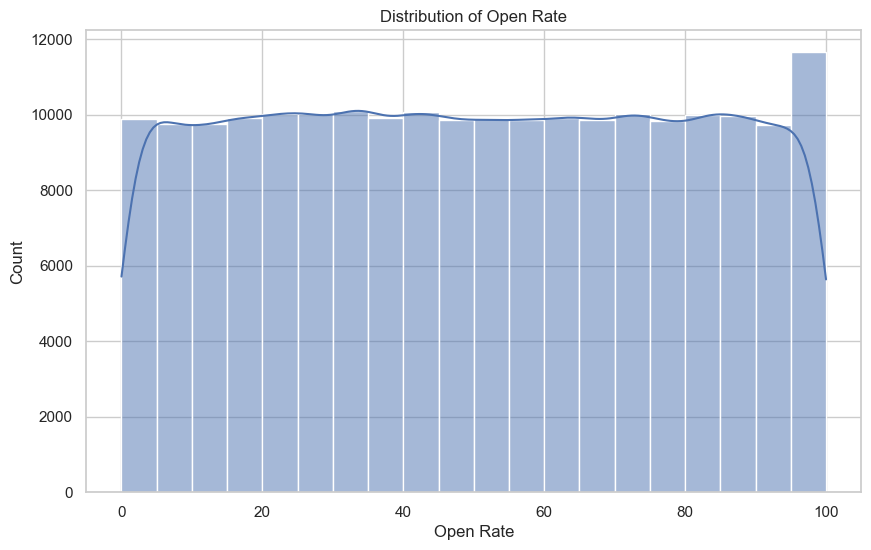

In [180]:
# Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(emails_campaign[target_variable], bins=20, kde=True)
plt.title(f'Distribution of {target_variable}')
plt.show()

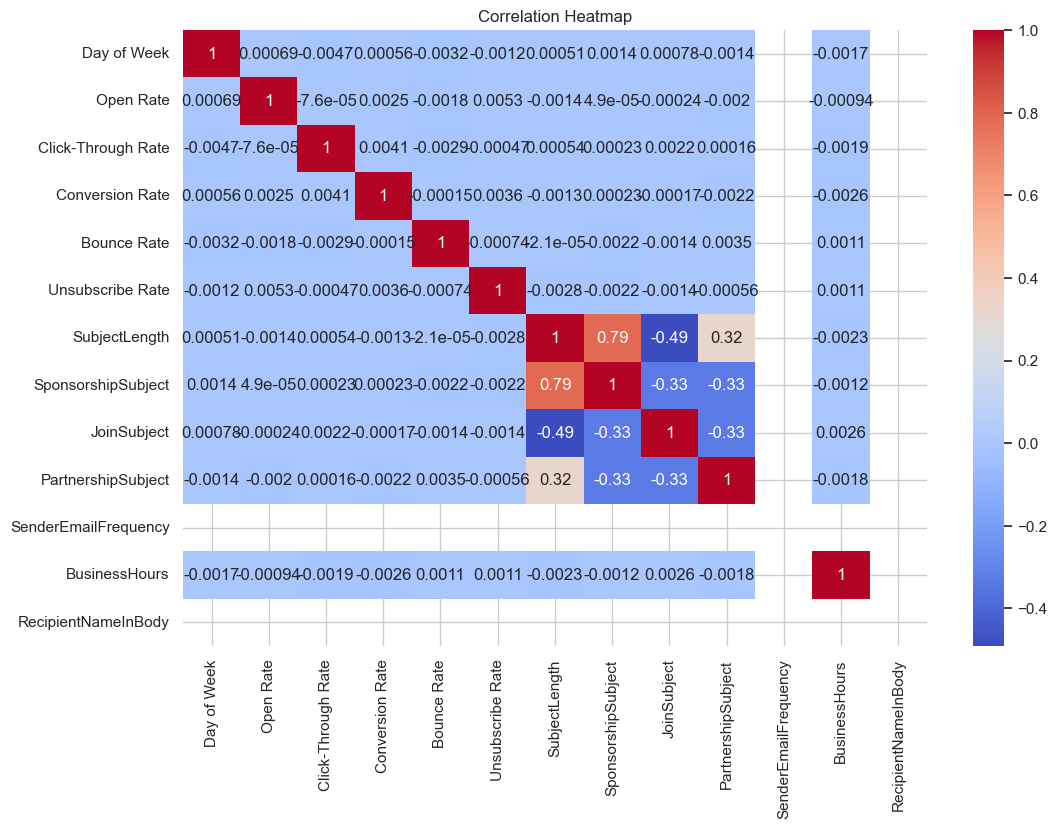

In [181]:
# Exclude non-numeric columns from correlation analysis
numerical_columns = emails_campaign.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = emails_campaign[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [182]:
emails_campaign['RecipientNameInBody'].dtype

dtype('int64')

# Machine Development and Machine Training

In [183]:
emails_campaign.dtypes

Sender ID                 object
Sender Name               object
Sender Email              object
Recipient ID              object
Recipient Name            object
Recipient Email           object
Subject Line              object
Email Body                object
Date Sent                 object
Time Sent                 object
Day of Week                int64
Month                      int32
Year                       int32
Open Rate                  int64
Click-Through Rate         int64
Conversion Rate            int64
Bounce Rate                int64
Unsubscribe Rate           int64
Hour                       int32
SubjectLength              int64
SponsorshipSubject         int64
JoinSubject                int64
PartnershipSubject         int64
SenderEmailFrequency       int64
Segmentation_Partner        bool
Segmentation_Sponsor        bool
Segmentation_Volunteer      bool
BusinessHours              int64
RecipientNameInBody        int64
dtype: object

Define the features and target variable and Split the data into training and testing sets

In [184]:
# Define the features and target variable
selected_features =['Subject Line', 'Day of Week', 'SubjectLength',
                        'Sender Email', 'BusinessHours',
                        'RecipientNameInBody','Year', 'Hour', 'Month', 'Sender Name', 'SenderEmailFrequency']


#Target variable = Open Rate

In [185]:
# Define the features and target variable
X = emails_campaign[selected_features]
y = emails_campaign['Open Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessing steps for numerical and categorical features

In [186]:
# Define the preprocessing steps for numerical and categorical features
numeric_features = ['Day of Week', 'SubjectLength','BusinessHours','RecipientNameInBody', 'Year', 'Hour', 'Month', 'SenderEmailFrequency',]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Sender Email', 'Subject Line', 'Sender Name']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessing steps and model pipeline

In [187]:
# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [188]:
# Create the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])


Model Training

In [189]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Day of Week',
                                                   'SubjectLength',
                                                   'BusinessHours',
                                                   'RecipientNameInBody',
                                                   'Year', 'Hour', 'Month',
                                                   'SenderEmailFrequency']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sender Email',
                                                   'Subject Line',
                                                   'Sender Name'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Predictions on the the test set

In [190]:
# Make predictions on the test set
y_pred = model.predict(X_test)

Model Evaluation

In [191]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.01

Confusion Matrix:
[[4 4 5 ... 1 8 2]
 [2 1 3 ... 9 3 4]
 [9 4 4 ... 6 5 1]
 ...
 [3 3 5 ... 8 0 2]
 [4 2 4 ... 3 2 3]
 [4 6 4 ... 9 3 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       406
           1       0.00      0.00      0.00       378
           2       0.01      0.01      0.01       423
           3       0.02      0.02      0.02       392
           4       0.01      0.01      0.01       370
           5       0.03      0.03      0.03       395
           6       0.02      0.02      0.02       372
           7       0.01      0.01      0.01       357
           8       0.01      0.02      0.01       399
           9       0.01      0.01      0.01       408
          10       0.01      0.00      0.00       425
          11       0.01      0.01      0.01       404
          12       0.01      0.01      0.01       386
          13       0.01      0.01      0.01       386
     

# Disclaimer!


The dataset used for training and testing is synthetic, which might not adequately capture the complexity and diversity of 
real-world scenarios. Therefore, the synthetic nature of the data is a primary contributor to the observed low model accuracy.  Models trained on synthetic data may struggle to generalize to unseen, real-world instances.

# Generate Insights

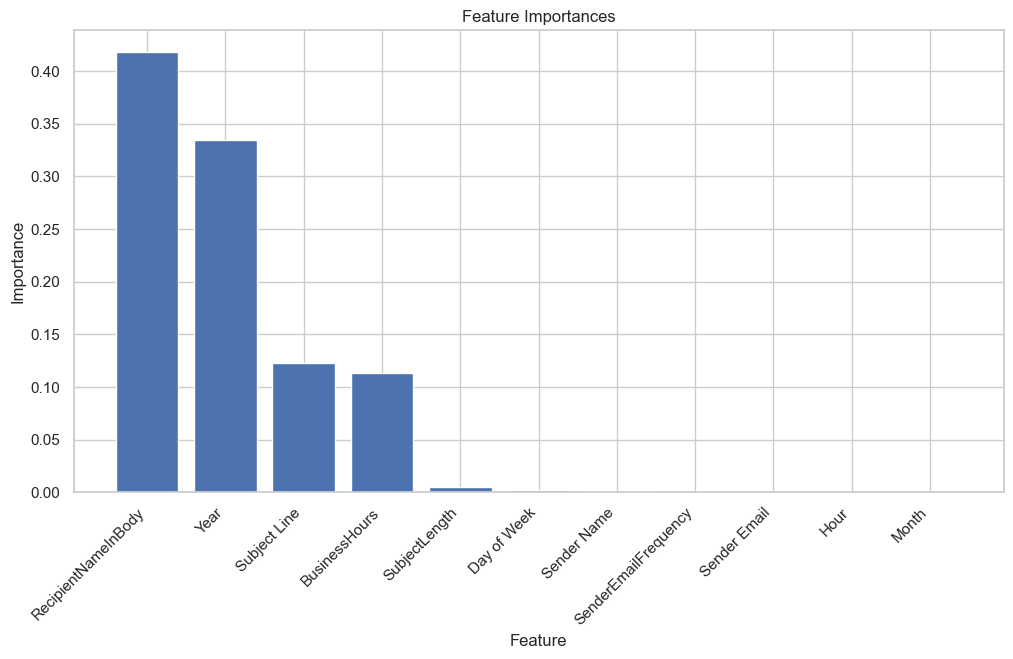

In [192]:
#Feature Importance
# pipeline is named 'model'
rf_estimator = model.named_steps['classifier']

# Get feature importances
feature_importances = rf_estimator.feature_importances_

# Pair feature names with importance scores
features = X.columns
feature_importance_dict = dict(zip(features, feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_features)), [x[1] for x in sorted_features], align="center")
plt.xticks(range(len(sorted_features)), [x[0] for x in sorted_features], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

# Insights Summary: Based on the features of importance results and the target variable (Open Rate).

RecipientNameInBody (0.42): 
Notably, including the recipient's name or addressing the recipient directly in the email
body/content significantly boosts the Open Rate, highlighting the impact of personalized content.

Year (0.33): 
The year of our email campaign seems to play a significant role, suggesting the importance of adapting our 
strategies to changing user behaviors and preferences over time. So we need to be aware of the certain trends or hypes or changes 
around our market that influence user behavior over the years that affect the Open Rate.

Subject Line (0.12): 
Crafting attention-grabbing subject lines is crucial. Emails with compelling subjects tend to have 
higher Open Rates, emphasizing the importance of a strong first impression.

Business Hours (0.11): 
Timing matters. Sending emails during business hours appears more effective, indicating the relevance
of aligning our delivery times with typical working hours. Moreover, this aligns with the common understanding that emails 
sent during active hours may have a better chance of being noticed.

Subject Length (0.01):
While not a major factor, shorter and clearer subject lines are slightly preferred and may be more 
effective. Keeping it concise may contribute to better Open Rates.

Day of Week, Sender Name, Sender Email, Hour, Month (0.00): 
These factors show minimal impact on Open Rates. Our focus should be on more influential aspects mentioned above.

SenderEmailFrequency, Sender Email, Hour, Month (0.00): 
These features display low importance, suggesting that adjusting email frequency or specific sender details may not significantly impact Open Rates.


In summary,
personalization, timing, and compelling subject lines are key strategies to enhance the success of our email 
campaigns in terms of Open Rates.


In [193]:
emails_campaign.to_csv('cleaned_email_campaign_data.csv', index=False)